In [1]:
!pip install mofapy2 mofax h5py

In [2]:
import pandas as pd
from mofapy2.run.entry_point import entry_point

In [3]:
# Base URL for data download
base_url = "https://raw.githubusercontent.com/WanbingZeng/OMINEX/main/data/"

In [21]:
x1 = pd.read_csv(base_url + "COREAD_gex.csv", index_col=0).T
x2 = pd.read_csv(base_url + "COREAD_mu.csv", index_col=0).T
x2[x2 > 0] = 1  # Binarization
x3 = pd.read_csv(base_url + "COREAD_cn.csv", index_col=0).T
covariates = pd.read_csv(base_url+"COREAD_subtypes.csv", index_col=0, header=0)
covariates=covariates[['subtypes']]

In [5]:
# Prepare data list
views = ["COREAD_gex", "COREAD_mu", "COREAD_cn"]
groups = ["all_samples"]  # Assuming all data is in one unified group

# Create nested list structure for MOFA
data = [[None] for _ in views]
data[0][0] = x1.values  # Data for the first view
data[1][0] = x2.values  # Data for the second view
data[2][0] = x3.values  # Data for the third view

In [6]:
# Initialize MOFA entry point
ent = entry_point()

# Set data matrix
ent.set_data_matrix(data)

# Set model options
ent.set_model_options(
    factors=2,  # Extract two principal components
    spikeslab_weights=True,
    ard_weights=True
)

# Set training options
ent.set_train_options(
    iter=1000, 
    convergence_mode="slow",
    dropR2=None,
    gpu_mode=False,
    seed=42
)

# Build the model
ent.build()

# Run the model
ent.run()

# Extract factor values
factors = ent.model.nodes["Z"].getExpectation()

# Output factor results
print("Factor 1:", factors[0])
print("Factor 2:", factors[1])

# Save the model
outfile = "/path/to/your/output.hdf5"
ent.save(outfile, save_data=True)

# End script
print("MOFA+ model training complete and results saved.")



        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
View names not provided, using default naming convention:
- view1, view2, ..., viewM

Features names not provided, using default naming convention:
- feature1_view1, featureD_viewM

Groups names not provided, using default naming convention:
- group1, group2, ..., groupG

Samples names not provided, using default naming convention:
- sample1_group1, sample2_group1, sample1_group

Iteration 78: time=0.00, ELBO=-175703.12, deltaELBO=0.672 (0.00010188%), Factors=2
Iteration 79: time=0.00, ELBO=-175702.46, deltaELBO=0.651 (0.00009876%), Factors=2
Iteration 80: time=0.02, ELBO=-175701.83, deltaELBO=0.632 (0.00009577%), Factors=2
Iteration 81: time=0.00, ELBO=-175701.22, deltaELBO=0.613 (0.00009290%), Factors=2
Iteration 82: time=0.02, ELBO=-175700.62, deltaELBO=0.595 (0.00009014%), Factors=2
Iteration 83: time=0.00, ELBO=-175700.05, deltaELBO=0.577 (0.00008750%), Factors=2
Iteration 84: time=0.02, ELBO=-175699.49, deltaELBO=0.560 (0.00008496%), Factors=2
Iteration 85: time=0.00, ELBO=-175698.94, deltaELBO=0.544 (0.00008252%), Factors=2
Iteration 86: time=0.02, ELBO=-175698.41, deltaELBO=0.529 (0.00008017%), Factors=2
Iteration 87: time=0.00, ELBO=-175697.90, deltaELBO=0.514 (0.00007791%), Factors=2
Iteration 88: time=0.02, ELBO=-175697.40, deltaELBO=0.500 (0.00007574%), Factors=2
Iteration 89: time=0.00, ELBO=-175696.92, deltaELBO=0.486 (0.00007364%), Factors=2
Iter

Iteration 176: time=0.02, ELBO=-175679.35, deltaELBO=0.074 (0.00001122%), Factors=2
Iteration 177: time=0.02, ELBO=-175679.28, deltaELBO=0.073 (0.00001102%), Factors=2
Iteration 178: time=0.01, ELBO=-175679.21, deltaELBO=0.071 (0.00001083%), Factors=2
Iteration 179: time=0.01, ELBO=-175679.14, deltaELBO=0.070 (0.00001064%), Factors=2
Iteration 180: time=0.00, ELBO=-175679.07, deltaELBO=0.069 (0.00001046%), Factors=2
Iteration 181: time=0.02, ELBO=-175679.00, deltaELBO=0.068 (0.00001028%), Factors=2
Iteration 182: time=0.00, ELBO=-175678.94, deltaELBO=0.067 (0.00001010%), Factors=2
Iteration 183: time=0.00, ELBO=-175678.87, deltaELBO=0.065 (0.00000993%), Factors=2
Iteration 184: time=0.00, ELBO=-175678.81, deltaELBO=0.064 (0.00000976%), Factors=2
Iteration 185: time=0.00, ELBO=-175678.74, deltaELBO=0.063 (0.00000959%), Factors=2
Iteration 186: time=0.02, ELBO=-175678.68, deltaELBO=0.062 (0.00000943%), Factors=2
Iteration 187: time=0.00, ELBO=-175678.62, deltaELBO=0.061 (0.00000927%), Fa

In [24]:
#factors

In [33]:
df_factors = pd.DataFrame(factors, index=x1.index, columns=['Factor 1', 'Factor 2'])# create a dataframe for factors
df_factors

,Factor 1,Factor 2
Case1,-0.191605,-1.169657
Case2,-0.481394,-1.048910
Case3,-0.646524,-0.712850
Case4,-0.478912,-0.217597
Case5,0.636579,-0.403172
...,...,...
Case117,-1.060382,1.612498
Case118,-0.086467,0.625262
Case119,-0.829916,0.238907
Case120,-0.379890,-1.828011


In [ ]:
# Visualisasion

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

Case1      blue
Case2      blue
Case3      blue
Case4      blue
Case5      blue
           ... 
Case117     red
Case118     red
Case119     red
Case120    blue
Case121    blue
Name: subtypes, Length: 121, dtype: object

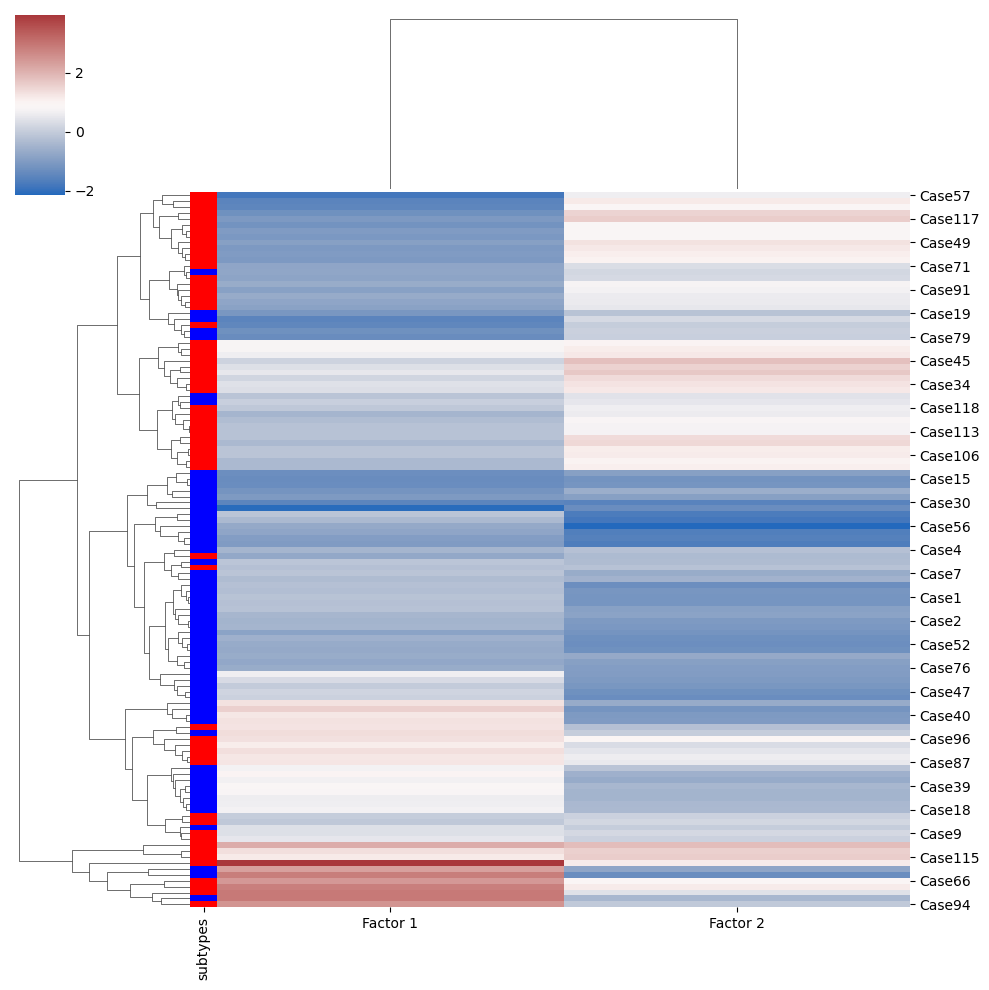

In [34]:
# Add colors to the subtypes and map them to the samples.
subtype_colors = {'CMS1': 'blue', 'CMS3': 'red'}
row_colors =covariates['subtypes'].map(subtype_colors)
sns.clustermap(df_factors, metric="euclidean", method="average", cmap="vlag",row_colors=row_colors)
plt.show()

## Exercise 1
Use the data from the same URL, which is the `BRCA` dataset, to perform MOFA+ analysis, identify the factors, and visualize the results.

## Exercise2
Can you incorporate any **methods** like feature selection to enhance factor analysis for better classification?